# Demand Forecasting EDA
### Kaggle Competition: demand-forecasting-kernels-only

This notebook performs comprehensive Exploratory Data Analysis on the demand forecasting dataset.

**Dataset Files:**
- `train.csv`: Training data with historical sales
- `test.csv`: Test data for predictions
- `sample_submission.csv`: Sample submission format

## 1. Setup and Data Loading

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

# Optional imports for advanced analysis
try:
    from scipy import stats
    SCIPY_AVAILABLE = True
except ImportError:
    SCIPY_AVAILABLE = False
    print("Warning: scipy not available. Some statistical tests will be skipped.")

try:
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    SKLEARN_AVAILABLE = True
except ImportError:
    SKLEARN_AVAILABLE = False
    print("Warning: sklearn not available. Some advanced analysis will be skipped.")

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Create output directory for graphs
OUTPUT_DIR = 'output_graphs'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    print(f"Created output directory: {OUTPUT_DIR}")

def save_plot(filename, dpi=300, bbox_inches='tight'):
    """Helper function to save plots"""
    filepath = os.path.join(OUTPUT_DIR, filename)
    plt.savefig(filepath, dpi=dpi, bbox_inches=bbox_inches)
    print(f"Saved plot: {filepath}")
    plt.show()

In [6]:
# Load datasets
print("Loading datasets...")

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

print(f"Train dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

Loading datasets...
Train dataset shape: (913000, 4)
Test dataset shape: (45000, 4)
Sample submission shape: (45000, 2)


## 2. Basic Data Exploration

In [7]:
# Training data overview
print("TRAINING DATA OVERVIEW")
print("="*50)
print(f"Shape: {train_df.shape}")
print(f"\nData types:")
print(train_df.dtypes)
print(f"\nFirst 5 rows:")
train_df.head()

TRAINING DATA OVERVIEW
Shape: (913000, 4)

Data types:
date     object
store     int64
item      int64
sales     int64
dtype: object

First 5 rows:


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [8]:
# Basic statistics
print("Basic Statistics:")
train_df.describe()

Basic Statistics:


,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [9]:
# Check for missing values
print("Missing values:")
print(train_df.isnull().sum())

print("\nUnique values per column:")
for col in train_df.columns:
    print(f"{col}: {train_df[col].nunique():,}")

Missing values:
date     0
store    0
item     0
sales    0
dtype: int64

Unique values per column:
date: 1,826
store: 10
item: 50
sales: 213


In [10]:
# Test data overview
print("TEST DATA OVERVIEW")
print("="*50)
print(f"Shape: {test_df.shape}")
print(f"\nFirst 5 rows:")
test_df.head()

TEST DATA OVERVIEW
Shape: (45000, 4)

First 5 rows:


,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


## 3. Sales Distribution Analysis

In [ ]:
# Enhanced Sales Distribution Analysis
def plot_sales_distribution(train_df):
    """Enhanced sales distribution analysis"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Original distribution
    axes[0, 0].hist(train_df['sales'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Sales Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Sales')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Log transformation
    log_sales = np.log1p(train_df['sales'])
    axes[0, 1].hist(log_sales, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Log(Sales + 1) Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Log(Sales + 1)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Box plot with outliers highlighted
    box_plot = axes[0, 2].boxplot(train_df['sales'], patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightgreen')
    axes[0, 2].set_title('Sales Boxplot', fontsize=14, fontweight='bold')
    axes[0, 2].set_ylabel('Sales')
    axes[0, 2].grid(True, alpha=0.3)
    
    # Q-Q plot for normality check
    if SCIPY_AVAILABLE:
        stats.probplot(train_df['sales'], dist="norm", plot=axes[1, 0])
        axes[1, 0].set_title('Q-Q Plot (Sales vs Normal)', fontsize=14, fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Q-Q plot for log-transformed data
        stats.probplot(log_sales, dist="norm", plot=axes[1, 1])
        axes[1, 1].set_title('Q-Q Plot (Log Sales vs Normal)', fontsize=14, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3)
    else:
        axes[1, 0].text(0.5, 0.5, 'Q-Q Plot\\nrequires scipy', 
                       ha='center', va='center', transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('Q-Q Plot (Not Available)')
        
        axes[1, 1].text(0.5, 0.5, 'Q-Q Plot (Log)\\nrequires scipy', 
                       ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Q-Q Plot Log (Not Available)')
    
    # Statistical summary text
    sales_stats = train_df['sales'].describe()
    if SCIPY_AVAILABLE:
        skewness = stats.skew(train_df['sales'])
        kurtosis = stats.kurtosis(train_df['sales'])
    else:
        skewness = 'N/A'
        kurtosis = 'N/A'
    
    stats_text = f"""Statistical Summary:
Mean: {sales_stats['mean']:.2f}
Median: {sales_stats['50%']:.2f}
Std: {sales_stats['std']:.2f}
Skewness: {skewness}
Kurtosis: {kurtosis}
Min: {sales_stats['min']:.2f}
Max: {sales_stats['max']:.2f}"""
    
    axes[1, 2].text(0.1, 0.5, stats_text, transform=axes[1, 2].transAxes, 
                    fontsize=11, verticalalignment='center',
                    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    axes[1, 2].set_title('Statistical Summary', fontsize=14, fontweight='bold')
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    save_plot('01_sales_distribution_analysis.png')
    
    # Perform Shapiro-Wilk test for normality (on sample due to size limits)
    if SCIPY_AVAILABLE:
        sample_size = min(5000, len(train_df))
        sample_sales = train_df['sales'].sample(sample_size, random_state=42)
        shapiro_stat, shapiro_p = stats.shapiro(sample_sales)
        
        print(f"\\nNormality Tests (sample of {sample_size}):")
        print(f"Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.2e}")
        print(f"Interpretation: {'Normal' if shapiro_p > 0.05 else 'Not normal'} distribution")
    else:
        print("\\nNormality tests require scipy (not available)")

# Run the enhanced analysis
plot_sales_distribution(train_df)

In [12]:
# Sales statistics
print("Sales Statistics:")
print(f"Mean: {train_df['sales'].mean():.2f}")
print(f"Median: {train_df['sales'].median():.2f}")
print(f"Mode: {train_df['sales'].mode().iloc[0]:.2f}")
print(f"Min: {train_df['sales'].min():.2f}")
print(f"Max: {train_df['sales'].max():.2f}")
print(f"Standard Deviation: {train_df['sales'].std():.2f}")
print(f"Coefficient of Variation: {train_df['sales'].std() / train_df['sales'].mean():.2f}")

Sales Statistics:
Mean: 52.25
Median: 47.00
Mode: 30.00
Min: 0.00
Max: 231.00
Standard Deviation: 28.80
Coefficient of Variation: 0.55


## 4. Temporal Patterns Analysis

In [13]:
# Convert date column and extract temporal features
if 'date' in train_df.columns:
    train_df['date'] = pd.to_datetime(train_df['date'])
    train_df['year'] = train_df['date'].dt.year
    train_df['month'] = train_df['date'].dt.month
    train_df['day'] = train_df['date'].dt.day
    train_df['weekday'] = train_df['date'].dt.day_name()
    train_df['day_of_year'] = train_df['date'].dt.dayofyear
    
    print(f"Date range: {train_df['date'].min()} to {train_df['date'].max()}")
    print(f"Number of years: {train_df['year'].nunique()}")
    print(f"Years covered: {sorted(train_df['year'].unique())}")

Date range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00
Number of years: 5
Years covered: [np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017)]


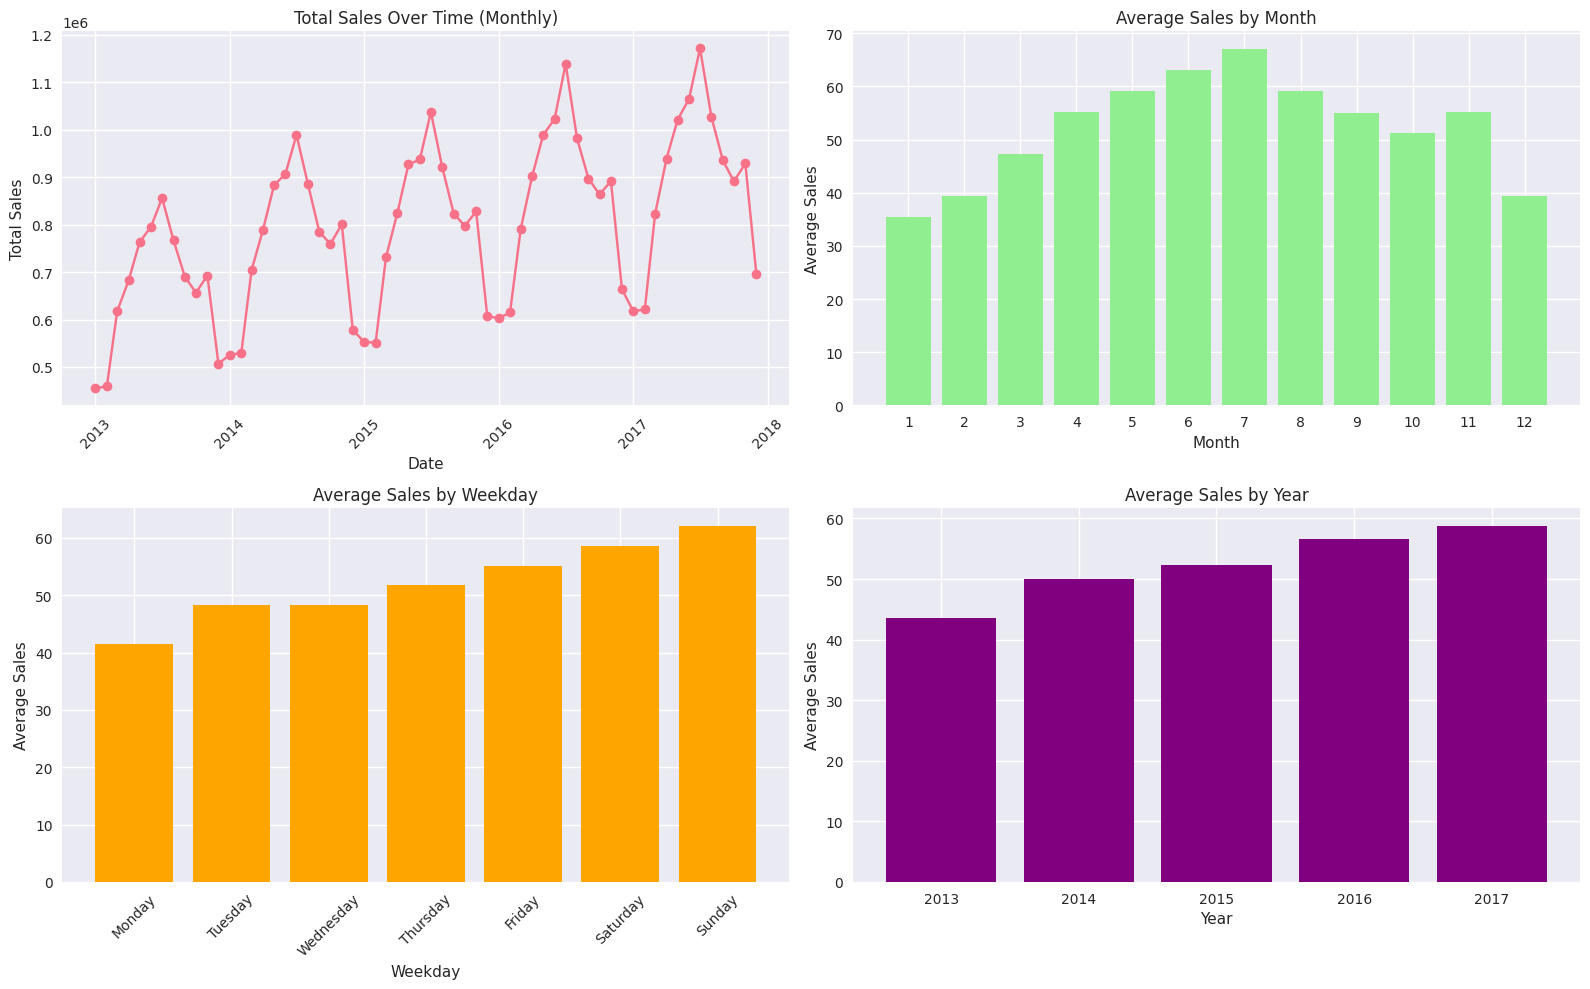

In [14]:
# Temporal patterns visualization
if 'date' in train_df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Sales over time (monthly aggregation)
    monthly_sales = train_df.groupby(['year', 'month'])['sales'].sum().reset_index()
    monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))
    
    axes[0, 0].plot(monthly_sales['date'], monthly_sales['sales'], marker='o')
    axes[0, 0].set_title('Total Sales Over Time (Monthly)')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Total Sales')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Average sales by month
    monthly_avg = train_df.groupby('month')['sales'].mean()
    axes[0, 1].bar(monthly_avg.index, monthly_avg.values, color='lightgreen')
    axes[0, 1].set_title('Average Sales by Month')
    axes[0, 1].set_xlabel('Month')
    axes[0, 1].set_ylabel('Average Sales')
    axes[0, 1].set_xticks(range(1, 13))
    
    # Average sales by weekday
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_avg = train_df.groupby('weekday')['sales'].mean().reindex(weekday_order)
    
    axes[1, 0].bar(range(len(weekday_avg)), weekday_avg.values, color='orange')
    axes[1, 0].set_title('Average Sales by Weekday')
    axes[1, 0].set_xlabel('Weekday')
    axes[1, 0].set_ylabel('Average Sales')
    axes[1, 0].set_xticks(range(len(weekday_avg)))
    axes[1, 0].set_xticklabels(weekday_avg.index, rotation=45)
    
    # Average sales by year
    yearly_avg = train_df.groupby('year')['sales'].mean()
    axes[1, 1].bar(yearly_avg.index, yearly_avg.values, color='purple')
    axes[1, 1].set_title('Average Sales by Year')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Average Sales')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Enhanced Temporal Patterns Analysis
def analyze_temporal_patterns(train_df):
    """Enhanced temporal pattern analysis"""
    if 'date' in train_df.columns:
        # Create a copy to avoid modifying original
        df_temp = train_df.copy()
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        df_temp['year'] = df_temp['date'].dt.year
        df_temp['month'] = df_temp['date'].dt.month
        df_temp['day'] = df_temp['date'].dt.day
        df_temp['weekday'] = df_temp['date'].dt.day_name()
        df_temp['quarter'] = df_temp['date'].dt.quarter
        df_temp['week'] = df_temp['date'].dt.isocalendar().week
        
        fig, axes = plt.subplots(3, 2, figsize=(20, 18))
        
        # 1. Time series plot with trend
        daily_sales = df_temp.groupby('date')['sales'].sum().reset_index()
        axes[0, 0].plot(daily_sales['date'], daily_sales['sales'], alpha=0.7, linewidth=1)
        
        # Add rolling average
        rolling_avg = daily_sales['sales'].rolling(window=30).mean()
        axes[0, 0].plot(daily_sales['date'], rolling_avg, color='red', linewidth=2, label='30-day MA')
        
        axes[0, 0].set_title('Daily Sales with Trend', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Date')
        axes[0, 0].set_ylabel('Total Daily Sales')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Monthly patterns with confidence intervals
        monthly_stats = df_temp.groupby('month')['sales'].agg(['mean', 'std', 'count']).reset_index()
        monthly_stats['ci'] = 1.96 * monthly_stats['std'] / np.sqrt(monthly_stats['count'])
        
        axes[0, 1].bar(monthly_stats['month'], monthly_stats['mean'], 
                      yerr=monthly_stats['ci'], capsize=5, color='lightgreen', alpha=0.7)
        axes[0, 1].set_title('Average Sales by Month (with 95% CI)', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Month')
        axes[0, 1].set_ylabel('Average Sales')
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Weekday patterns
        weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        weekday_stats = df_temp.groupby('weekday')['sales'].agg(['mean', 'std', 'count'])
        weekday_stats = weekday_stats.reindex(weekday_order)
        weekday_stats['ci'] = 1.96 * weekday_stats['std'] / np.sqrt(weekday_stats['count'])
        
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF']
        bars = axes[1, 0].bar(range(len(weekday_stats)), weekday_stats['mean'], 
                             yerr=weekday_stats['ci'], capsize=5, color=colors, alpha=0.8)
        axes[1, 0].set_title('Average Sales by Weekday (with 95% CI)', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Weekday')
        axes[1, 0].set_ylabel('Average Sales')
        axes[1, 0].set_xticks(range(len(weekday_stats)))
        axes[1, 0].set_xticklabels(weekday_stats.index, rotation=45)
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Yearly trends
        yearly_stats = df_temp.groupby('year')['sales'].agg(['mean', 'sum', 'count'])
        
        ax_twin = axes[1, 1].twinx()
        bars1 = axes[1, 1].bar(yearly_stats.index - 0.2, yearly_stats['sum']/1000, 
                              width=0.4, label='Total Sales (K)', color='steelblue', alpha=0.7)
        bars2 = ax_twin.bar(yearly_stats.index + 0.2, yearly_stats['mean'], 
                           width=0.4, label='Average Sales', color='orange', alpha=0.7)
        
        axes[1, 1].set_title('Yearly Sales Trends', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Year')
        axes[1, 1].set_ylabel('Total Sales (Thousands)', color='steelblue')
        ax_twin.set_ylabel('Average Sales', color='orange')
        axes[1, 1].legend(loc='upper left')
        ax_twin.legend(loc='upper right')
        axes[1, 1].grid(True, alpha=0.3)
        
        # 5. Heatmap: Month vs Year
        pivot_month_year = df_temp.pivot_table(values='sales', index='month', columns='year', aggfunc='mean')
        im = axes[2, 0].imshow(pivot_month_year.values, cmap='YlOrRd', aspect='auto')
        axes[2, 0].set_title('Sales Heatmap: Month vs Year', fontsize=14, fontweight='bold')
        axes[2, 0].set_xlabel('Year')
        axes[2, 0].set_ylabel('Month')
        axes[2, 0].set_xticks(range(len(pivot_month_year.columns)))
        axes[2, 0].set_xticklabels(pivot_month_year.columns)
        axes[2, 0].set_yticks(range(len(pivot_month_year.index)))
        axes[2, 0].set_yticklabels(pivot_month_year.index)
        plt.colorbar(im, ax=axes[2, 0], label='Average Sales')
        
        # 6. Quarterly analysis
        quarterly_stats = df_temp.groupby(['year', 'quarter'])['sales'].sum().reset_index()
        quarterly_stats['period'] = quarterly_stats['year'].astype(str) + '-Q' + quarterly_stats['quarter'].astype(str)
        
        axes[2, 1].plot(range(len(quarterly_stats)), quarterly_stats['sales'], 
                       marker='o', linewidth=2, markersize=6, color='purple')
        axes[2, 1].set_title('Quarterly Sales Trend', fontsize=14, fontweight='bold')
        axes[2, 1].set_xlabel('Quarter')
        axes[2, 1].set_ylabel('Total Sales')
        axes[2, 1].set_xticks(range(0, len(quarterly_stats), 4))
        axes[2, 1].set_xticklabels([quarterly_stats.iloc[i]['period'] for i in range(0, len(quarterly_stats), 4)], rotation=45)
        axes[2, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        save_plot('02_temporal_patterns_analysis.png')
        
        # Statistical tests for seasonality
        print("\\nSeasonality Analysis:")
        if SCIPY_AVAILABLE:
            # ANOVA test for monthly differences
            monthly_groups = [group['sales'].values for name, group in df_temp.groupby('month')]
            f_stat, p_val = stats.f_oneway(*monthly_groups)
            print(f"Monthly seasonality ANOVA: F-statistic={f_stat:.2f}, p-value={p_val:.2e}")
            
            # ANOVA test for weekday differences
            weekday_groups = [group['sales'].values for name, group in df_temp.groupby('weekday')]
            f_stat_wd, p_val_wd = stats.f_oneway(*weekday_groups)
            print(f"Weekday seasonality ANOVA: F-statistic={f_stat_wd:.2f}, p-value={p_val_wd:.2e}")
        else:
            print("ANOVA tests require scipy (not available)")

# Run enhanced temporal analysis
analyze_temporal_patterns(train_df)

## 5. Store and Item Analysis

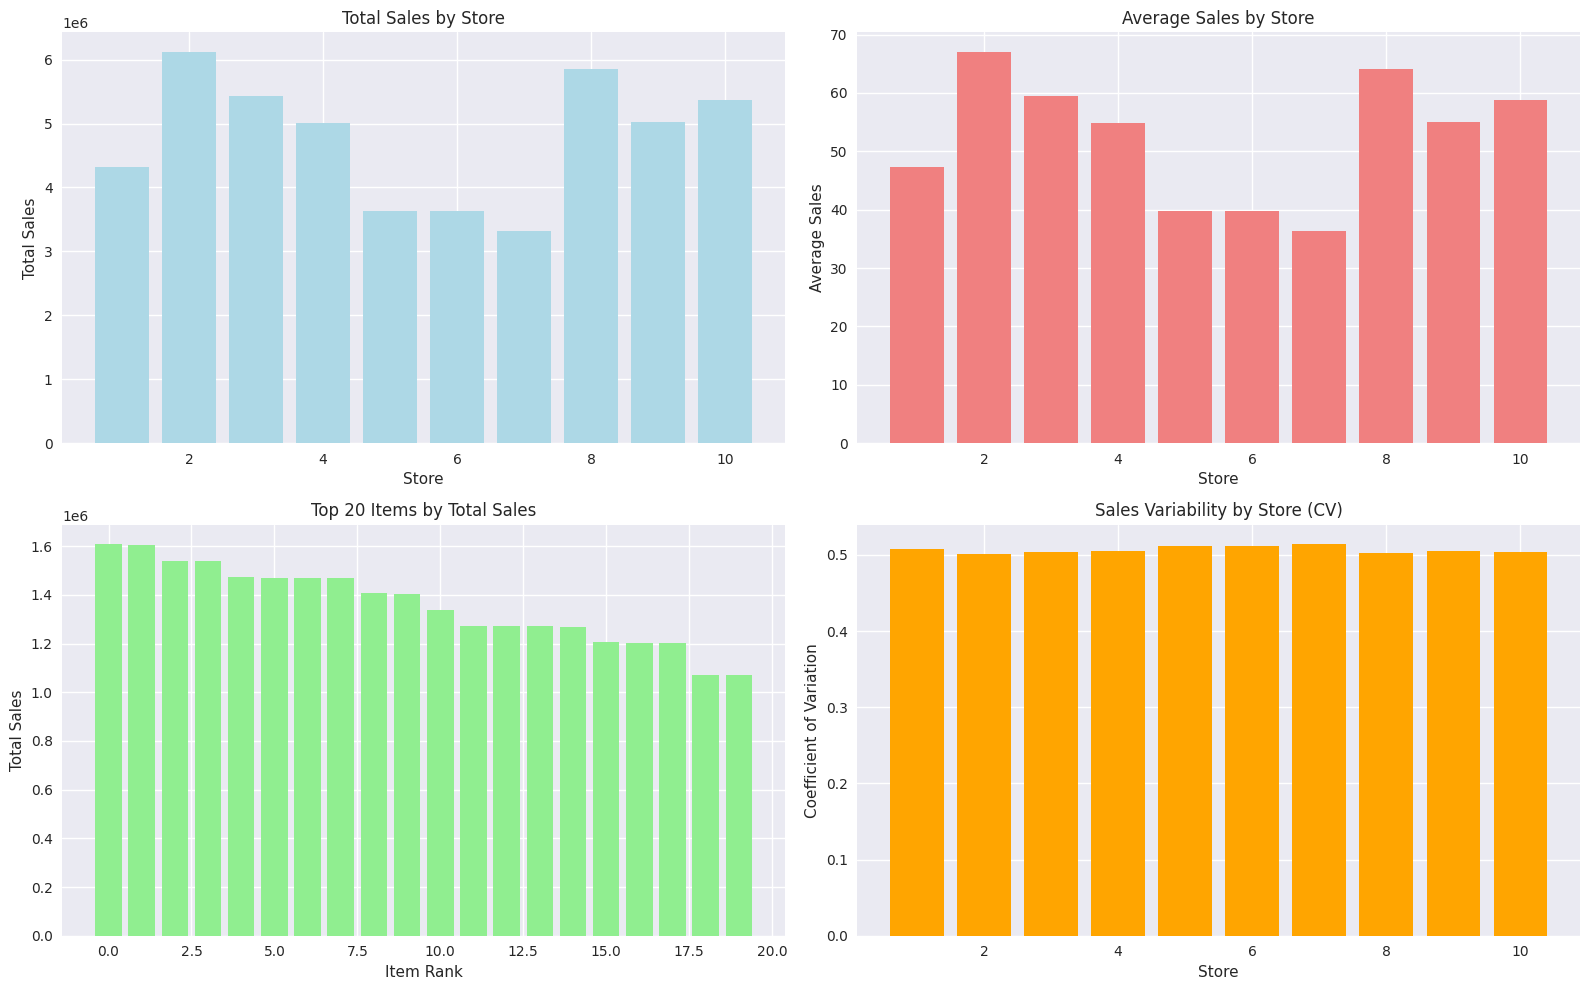

In [15]:
# Store and item patterns
if 'store' in train_df.columns and 'item' in train_df.columns:
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Sales by store
    store_sales = train_df.groupby('store')['sales'].agg(['mean', 'sum', 'std']).reset_index()
    
    axes[0, 0].bar(store_sales['store'], store_sales['sum'], color='lightblue')
    axes[0, 0].set_title('Total Sales by Store')
    axes[0, 0].set_xlabel('Store')
    axes[0, 0].set_ylabel('Total Sales')
    
    axes[0, 1].bar(store_sales['store'], store_sales['mean'], color='lightcoral')
    axes[0, 1].set_title('Average Sales by Store')
    axes[0, 1].set_xlabel('Store')
    axes[0, 1].set_ylabel('Average Sales')
    
    # Top items by sales
    item_sales = train_df.groupby('item')['sales'].sum().sort_values(ascending=False).head(20)
    
    axes[1, 0].bar(range(len(item_sales)), item_sales.values, color='lightgreen')
    axes[1, 0].set_title('Top 20 Items by Total Sales')
    axes[1, 0].set_xlabel('Item Rank')
    axes[1, 0].set_ylabel('Total Sales')
    
    # Coefficient of variation by store
    store_sales['cv'] = store_sales['std'] / store_sales['mean']
    axes[1, 1].bar(store_sales['store'], store_sales['cv'], color='orange')
    axes[1, 1].set_title('Sales Variability by Store (CV)')
    axes[1, 1].set_xlabel('Store')
    axes[1, 1].set_ylabel('Coefficient of Variation')
    
    plt.tight_layout()
    plt.show()

In [16]:
# Store and item statistics
if 'store' in train_df.columns and 'item' in train_df.columns:
    print("Store and Item Statistics:")
    print(f"Number of stores: {train_df['store'].nunique()}")
    print(f"Number of items: {train_df['item'].nunique()}")
    print(f"Store range: {train_df['store'].min()} to {train_df['store'].max()}")
    print(f"Item range: {train_df['item'].min()} to {train_df['item'].max()}")
    
    # Sales statistics by store
    print("\nSales by Store:")
    store_stats = train_df.groupby('store')['sales'].agg(['count', 'mean', 'std', 'min', 'max'])
    print(store_stats)

Store and Item Statistics:
Number of stores: 10
Number of items: 50
Store range: 1 to 10
Item range: 1 to 50

Sales by Store:
       count       mean        std  min  max
store                                       
1      91300  47.268379  24.006252    1  155
2      91300  67.033165  33.595810    3  231
3      91300  59.530602  29.974102    3  196
4      91300  54.902946  27.733097    4  186
5      91300  39.770164  20.365757    2  130
6      91300  39.733516  20.310451    0  134
7      91300  36.363735  18.684825    1  122
8      91300  64.142048  32.231751    4  204
9      91300  55.049025  27.832186    4  195
10     91300  58.709288  29.554994    3  187


In [ ]:
# Enhanced Store-Item Performance Analysis
def analyze_store_item_patterns(train_df):
    """Enhanced store and item pattern analysis"""
    if 'store' in train_df.columns and 'item' in train_df.columns:
        
        fig, axes = plt.subplots(3, 2, figsize=(20, 18))
        
        # Store analysis
        store_sales = train_df.groupby('store')['sales'].agg(['mean', 'sum', 'std', 'count', 'median']).reset_index()
        store_sales['cv'] = store_sales['std'] / store_sales['mean']
        store_sales['se'] = store_sales['std'] / np.sqrt(store_sales['count'])
        
        # Total sales by store with error bars
        axes[0, 0].bar(store_sales['store'], store_sales['sum']/1000, 
                      color='steelblue', alpha=0.7, edgecolor='black')
        axes[0, 0].set_title('Total Sales by Store', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Store ID')
        axes[0, 0].set_ylabel('Total Sales (Thousands)')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Average sales by store with confidence intervals
        axes[0, 1].bar(store_sales['store'], store_sales['mean'], 
                      yerr=1.96*store_sales['se'], capsize=5,
                      color='lightcoral', alpha=0.7, edgecolor='black')
        axes[0, 1].set_title('Average Sales by Store (with 95% CI)', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Store ID')
        axes[0, 1].set_ylabel('Average Sales')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Item analysis - top performers
        item_stats = train_df.groupby('item')['sales'].agg(['mean', 'sum', 'count', 'std']).reset_index()
        item_stats['cv'] = item_stats['std'] / item_stats['mean']
        top_items = item_stats.nlargest(15, 'sum')
        
        colors_gradient = plt.cm.viridis(np.linspace(0, 1, len(top_items)))
        bars = axes[1, 0].bar(range(len(top_items)), top_items['sum']/1000, 
                             color=colors_gradient, alpha=0.8, edgecolor='black')
        axes[1, 0].set_title('Top 15 Items by Total Sales', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Item Rank')
        axes[1, 0].set_ylabel('Total Sales (Thousands)')
        axes[1, 0].set_xticks(range(len(top_items)))
        axes[1, 0].set_xticklabels([f'Item {x}' for x in top_items['item']], rotation=45)
        axes[1, 0].grid(True, alpha=0.3)
        
        # Sales variability analysis
        axes[1, 1].scatter(store_sales['mean'], store_sales['cv'], 
                          s=store_sales['sum']/1000, alpha=0.7, c='orange', edgecolors='black')
        axes[1, 1].set_title('Sales Variability vs Average (Store Level)', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Average Sales')
        axes[1, 1].set_ylabel('Coefficient of Variation')
        axes[1, 1].grid(True, alpha=0.3)
        
        # Add store labels
        for i, row in store_sales.iterrows():
            axes[1, 1].annotate(f\"S{int(row['store'])}\", 
                              (row['mean'], row['cv']), 
                              xytext=(5, 5), textcoords='offset points', fontsize=8)
        
        # Store performance distribution
        axes[2, 0].boxplot([train_df[train_df['store'] == store]['sales'].values 
                           for store in sorted(train_df['store'].unique())],
                          labels=[f'S{i}' for i in sorted(train_df['store'].unique())])
        axes[2, 0].set_title('Sales Distribution by Store', fontsize=14, fontweight='bold')
        axes[2, 0].set_xlabel('Store ID')
        axes[2, 0].set_ylabel('Sales')
        axes[2, 0].tick_params(axis='x', rotation=45)
        axes[2, 0].grid(True, alpha=0.3)
        
        # Item performance variability
        item_cv_top = item_stats.nlargest(15, 'cv')
        axes[2, 1].bar(range(len(item_cv_top)), item_cv_top['cv'], 
                      color='purple', alpha=0.7, edgecolor='black')
        axes[2, 1].set_title('Most Variable Items (Top 15 by CV)', fontsize=14, fontweight='bold')
        axes[2, 1].set_xlabel('Item')
        axes[2, 1].set_ylabel('Coefficient of Variation')
        axes[2, 1].set_xticks(range(len(item_cv_top)))
        axes[2, 1].set_xticklabels([f'Item {x}' for x in item_cv_top['item']], rotation=45)
        axes[2, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        save_plot('03_store_item_patterns_analysis.png')
        
        # Enhanced heatmap with clustering
        print("\\nGenerating Store-Item Sales Heatmap...")
        # Sample items for visualization if too many
        max_items_display = 25
        if len(train_df['item'].unique()) > max_items_display:
            top_items_list = item_stats.nlargest(max_items_display, 'sum')['item'].tolist()
            pivot_data = train_df[train_df['item'].isin(top_items_list)]
        else:
            pivot_data = train_df
            
        pivot_table = pivot_data.pivot_table(values='sales', index='store', columns='item', aggfunc='mean')
        
        plt.figure(figsize=(16, 10))
        mask = pivot_table.isnull()
        sns.heatmap(pivot_table, cmap='RdYlBu_r', cbar_kws={'label': 'Average Sales'},
                   mask=mask, linewidths=0.5, square=False, 
                   cbar=True, annot=False)
        plt.title(f'Average Sales Heatmap: Store vs Item (Top {min(max_items_display, len(pivot_table.columns))} Items)', 
                 fontsize=16, fontweight='bold')
        plt.xlabel('Item ID', fontsize=12)
        plt.ylabel('Store ID', fontsize=12)
        plt.tight_layout()
        save_plot('04_store_item_heatmap.png')
        
        # Statistical analysis
        print("\\nStore-Item Statistical Analysis:")
        if SCIPY_AVAILABLE:
            # ANOVA for store differences
            store_groups = [group['sales'].values for name, group in train_df.groupby('store')]
            f_stat_store, p_val_store = stats.f_oneway(*store_groups)
            print(f"Store differences ANOVA: F-statistic={f_stat_store:.2f}, p-value={p_val_store:.2e}")
            
            # ANOVA for item differences  
            item_groups = [group['sales'].values for name, group in train_df.groupby('item')]
            f_stat_item, p_val_item = stats.f_oneway(*item_groups)
            print(f"Item differences ANOVA: F-statistic={f_stat_item:.2f}, p-value={p_val_item:.2e}")
        else:
            print("ANOVA tests require scipy (not available)")
        
        # Top and bottom performers
        print(f"\\nTop 5 performing stores (by average sales):")
        top_stores = store_sales.nlargest(5, 'mean')[['store', 'mean', 'sum']]
        for _, row in top_stores.iterrows():
            print(f"  Store {int(row['store'])}: Avg={row['mean']:.2f}, Total={row['sum']:.0f}")
            
        print(f"\\nTop 5 performing items (by total sales):")
        top_items_display = item_stats.nlargest(5, 'sum')[['item', 'mean', 'sum']]
        for _, row in top_items_display.iterrows():
            print(f"  Item {int(row['item'])}: Avg={row['mean']:.2f}, Total={row['sum']:.0f}")

# Run enhanced store-item analysis
analyze_store_item_patterns(train_df)

In [ ]:
# Enhanced Correlation Analysis
numerical_cols = train_df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = train_df[numerical_cols].corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
               square=True, linewidths=0.5, fmt='.3f')
    plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    save_plot('05_correlation_matrix.png')
    
    # Print correlation with sales
    if 'sales' in correlation_matrix.columns:
        print("\nCorrelations with Sales:")
        sales_corr = correlation_matrix['sales'].drop('sales').sort_values(key=abs, ascending=False)
        print(sales_corr)

## 6. Correlation Analysis

In [ ]:
# Enhanced Seasonal Decomposition Analysis
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    from statsmodels.tsa.stattools import adfuller
    
    if 'date' in train_df.columns:
        df_temp = train_df.copy()
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        
        # Aggregate daily sales
        daily_sales = df_temp.groupby('date')['sales'].sum().reset_index()
        daily_sales = daily_sales.set_index('date')
        daily_sales = daily_sales.asfreq('D', fill_value=0)
        
        if len(daily_sales) > 2 * 365:
            print("\\nPerforming Enhanced Seasonal Decomposition Analysis...")
            
            # Additive decomposition
            decomp_add = seasonal_decompose(daily_sales['sales'], model='additive', period=365)
            
            # Multiplicative decomposition
            # Add small constant to avoid zero values
            sales_positive = daily_sales['sales'] + 1
            decomp_mult = seasonal_decompose(sales_positive, model='multiplicative', period=365)
            
            fig, axes = plt.subplots(4, 2, figsize=(20, 16))
            
            # Additive decomposition
            decomp_add.observed.plot(ax=axes[0, 0], title='Original Sales (Additive)', color='blue')
            axes[0, 0].grid(True, alpha=0.3)
            
            decomp_add.trend.plot(ax=axes[1, 0], title='Trend Component (Additive)', color='green')
            axes[1, 0].grid(True, alpha=0.3)
            
            decomp_add.seasonal.plot(ax=axes[2, 0], title='Seasonal Component (Additive)', color='orange')
            axes[2, 0].grid(True, alpha=0.3)
            
            decomp_add.resid.plot(ax=axes[3, 0], title='Residual Component (Additive)', color='red')
            axes[3, 0].grid(True, alpha=0.3)
            
            # Multiplicative decomposition
            decomp_mult.observed.plot(ax=axes[0, 1], title='Original Sales (Multiplicative)', color='blue')
            axes[0, 1].grid(True, alpha=0.3)
            
            decomp_mult.trend.plot(ax=axes[1, 1], title='Trend Component (Multiplicative)', color='green')
            axes[1, 1].grid(True, alpha=0.3)
            
            decomp_mult.seasonal.plot(ax=axes[2, 1], title='Seasonal Component (Multiplicative)', color='orange')
            axes[2, 1].grid(True, alpha=0.3)
            
            decomp_mult.resid.plot(ax=axes[3, 1], title='Residual Component (Multiplicative)', color='red')
            axes[3, 1].grid(True, alpha=0.3)
            
            plt.tight_layout()
            save_plot('06_seasonal_decomposition.png')
            
            # Stationarity test
            print("\\nStationarity Analysis:")
            adf_result = adfuller(daily_sales['sales'].dropna())
            print(f"ADF Statistic: {adf_result[0]:.6f}")
            print(f"p-value: {adf_result[1]:.6f}")
            print(f"Critical Values:")
            for key, value in adf_result[4].items():
                print(f"\\t{key}: {value:.3f}")
            
            is_stationary = adf_result[1] < 0.05
            print(f"Series is {'stationary' if is_stationary else 'non-stationary'} (p<0.05)")
            
            # Seasonal strength analysis
            seasonal_strength = 1 - (np.var(decomp_add.resid.dropna()) / np.var(decomp_add.seasonal.dropna() + decomp_add.resid.dropna()))
            trend_strength = 1 - (np.var(decomp_add.resid.dropna()) / np.var(decomp_add.trend.dropna() + decomp_add.resid.dropna()))
            
            print(f"\\nDecomposition Strength:")
            print(f"Seasonal Strength: {seasonal_strength:.4f}")
            print(f"Trend Strength: {trend_strength:.4f}")
            
        else:
            print(f"Not enough data for seasonal decomposition. Need 2+ years, have {len(daily_sales)} days")
            
except ImportError:
    print("statsmodels not available for seasonal decomposition")

# Comprehensive Outlier Detection Analysis
def outlier_analysis(train_df):
    """Comprehensive outlier detection and analysis"""
    print("Performing comprehensive outlier detection...")
    
    sales_data = train_df['sales'].values
    
    # Multiple outlier detection methods
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # 1. Z-score method
    if SCIPY_AVAILABLE:
        z_scores = np.abs(stats.zscore(sales_data))
        z_outliers = sales_data[z_scores > 3]
    else:
        # Manual z-score calculation
        mean_sales = np.mean(sales_data)
        std_sales = np.std(sales_data)
        z_scores = np.abs((sales_data - mean_sales) / std_sales)
        z_outliers = sales_data[z_scores > 3]
    
    axes[0, 0].hist(sales_data, bins=50, alpha=0.7, label='Normal', color='blue')
    axes[0, 0].hist(z_outliers, bins=20, alpha=0.7, label=f'Z-score Outliers (n={len(z_outliers)})', color='red')
    axes[0, 0].set_title('Z-Score Outlier Detection')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. IQR method
    Q1 = np.percentile(sales_data, 25)
    Q3 = np.percentile(sales_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = sales_data[(sales_data < lower_bound) | (sales_data > upper_bound)]
    
    axes[0, 1].boxplot(sales_data)
    axes[0, 1].set_title(f'IQR Method (n={len(iqr_outliers)} outliers)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Modified Z-score (using median)
    median = np.median(sales_data)
    mad = np.median(np.abs(sales_data - median))
    modified_z_scores = 0.6745 * (sales_data - median) / mad
    modified_z_outliers = sales_data[np.abs(modified_z_scores) > 3.5]
    
    axes[0, 2].hist(sales_data, bins=50, alpha=0.7, label='Normal', color='blue')
    axes[0, 2].hist(modified_z_outliers, bins=20, alpha=0.7, 
                   label=f'Modified Z-score Outliers (n={len(modified_z_outliers)})', color='orange')
    axes[0, 2].set_title('Modified Z-Score Method')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Isolation Forest
    if SKLEARN_AVAILABLE:
        try:
            from sklearn.ensemble import IsolationForest
            
            iso_forest = IsolationForest(contamination=0.05, random_state=42)
            outlier_pred = iso_forest.fit_predict(sales_data.reshape(-1, 1))
            iso_outliers = sales_data[outlier_pred == -1]
            
            axes[1, 0].hist(sales_data, bins=50, alpha=0.7, label='Normal', color='blue')
            axes[1, 0].hist(iso_outliers, bins=20, alpha=0.7, 
                           label=f'Isolation Forest Outliers (n={len(iso_outliers)})', color='green')
            axes[1, 0].set_title('Isolation Forest Method')
            axes[1, 0].legend()
            axes[1, 0].grid(True, alpha=0.3)
            
        except Exception as e:
            axes[1, 0].text(0.5, 0.5, f'Isolation Forest\\nError: {str(e)}', 
                           ha='center', va='center', transform=axes[1, 0].transAxes)
            axes[1, 0].set_title('Isolation Forest (Error)')
    else:
        axes[1, 0].text(0.5, 0.5, 'Isolation Forest\\nrequires scikit-learn', 
                       ha='center', va='center', transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('Isolation Forest (Not Available)')
    
    # 5. Percentile method
    p99 = np.percentile(sales_data, 99)
    p1 = np.percentile(sales_data, 1)
    percentile_outliers = sales_data[(sales_data > p99) | (sales_data < p1)]
    
    axes[1, 1].hist(sales_data, bins=50, alpha=0.7, label='Normal', color='blue')
    axes[1, 1].hist(percentile_outliers, bins=20, alpha=0.7, 
                   label=f'99th Percentile Outliers (n={len(percentile_outliers)})', color='purple')
    axes[1, 1].set_title('Percentile Method (1st & 99th)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Summary comparison
    outlier_methods = {
        'Z-Score (3σ)': len(z_outliers),
        'IQR (1.5×IQR)': len(iqr_outliers),
        'Modified Z-Score': len(modified_z_outliers),
        'Percentile (1-99%)': len(percentile_outliers)
    }
    
    if SKLEARN_AVAILABLE:
        try:
            outlier_methods['Isolation Forest'] = len(iso_outliers)
        except:
            pass
    
    methods = list(outlier_methods.keys())
    counts = list(outlier_methods.values())
    
    bars = axes[1, 2].bar(range(len(methods)), counts, color=['red', 'blue', 'orange', 'purple', 'green'][:len(methods)])
    axes[1, 2].set_title('Outlier Count by Method')
    axes[1, 2].set_xlabel('Detection Method')
    axes[1, 2].set_ylabel('Number of Outliers')
    axes[1, 2].set_xticks(range(len(methods)))
    axes[1, 2].set_xticklabels(methods, rotation=45, ha='right')
    axes[1, 2].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        axes[1, 2].text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                       f'{count}', ha='center', va='bottom')
    
    plt.tight_layout()
    save_plot('08_outlier_detection_analysis.png')
    
    # Outlier analysis by categories
    if 'store' in train_df.columns:
        print("\\nOutlier Analysis by Store:")
        for store in sorted(train_df['store'].unique()):
            store_sales = train_df[train_df['store'] == store]['sales']
            if SCIPY_AVAILABLE:
                store_z_scores = np.abs(stats.zscore(store_sales))
            else:
                store_mean = np.mean(store_sales)
                store_std = np.std(store_sales)
                store_z_scores = np.abs((store_sales - store_mean) / store_std)
            store_outliers = len(store_sales[store_z_scores > 3])
            outlier_percentage = (store_outliers / len(store_sales)) * 100
            print(f"  Store {store}: {store_outliers} outliers ({outlier_percentage:.2f}%)")
    
    # Impact analysis
    total_sales_with_outliers = sales_data.sum()
    total_sales_without_z_outliers = sales_data[z_scores <= 3].sum()
    outlier_impact = ((total_sales_with_outliers - total_sales_without_z_outliers) / total_sales_with_outliers) * 100
    
    print(f"\\nOutlier Impact Analysis:")
    print(f"Total sales: {total_sales_with_outliers:,.0f}")
    print(f"Sales from Z-score outliers: {total_sales_with_outliers - total_sales_without_z_outliers:,.0f}")
    print(f"Outlier contribution to total sales: {outlier_impact:.2f}%")

# Run comprehensive outlier analysis
outlier_analysis(train_df)

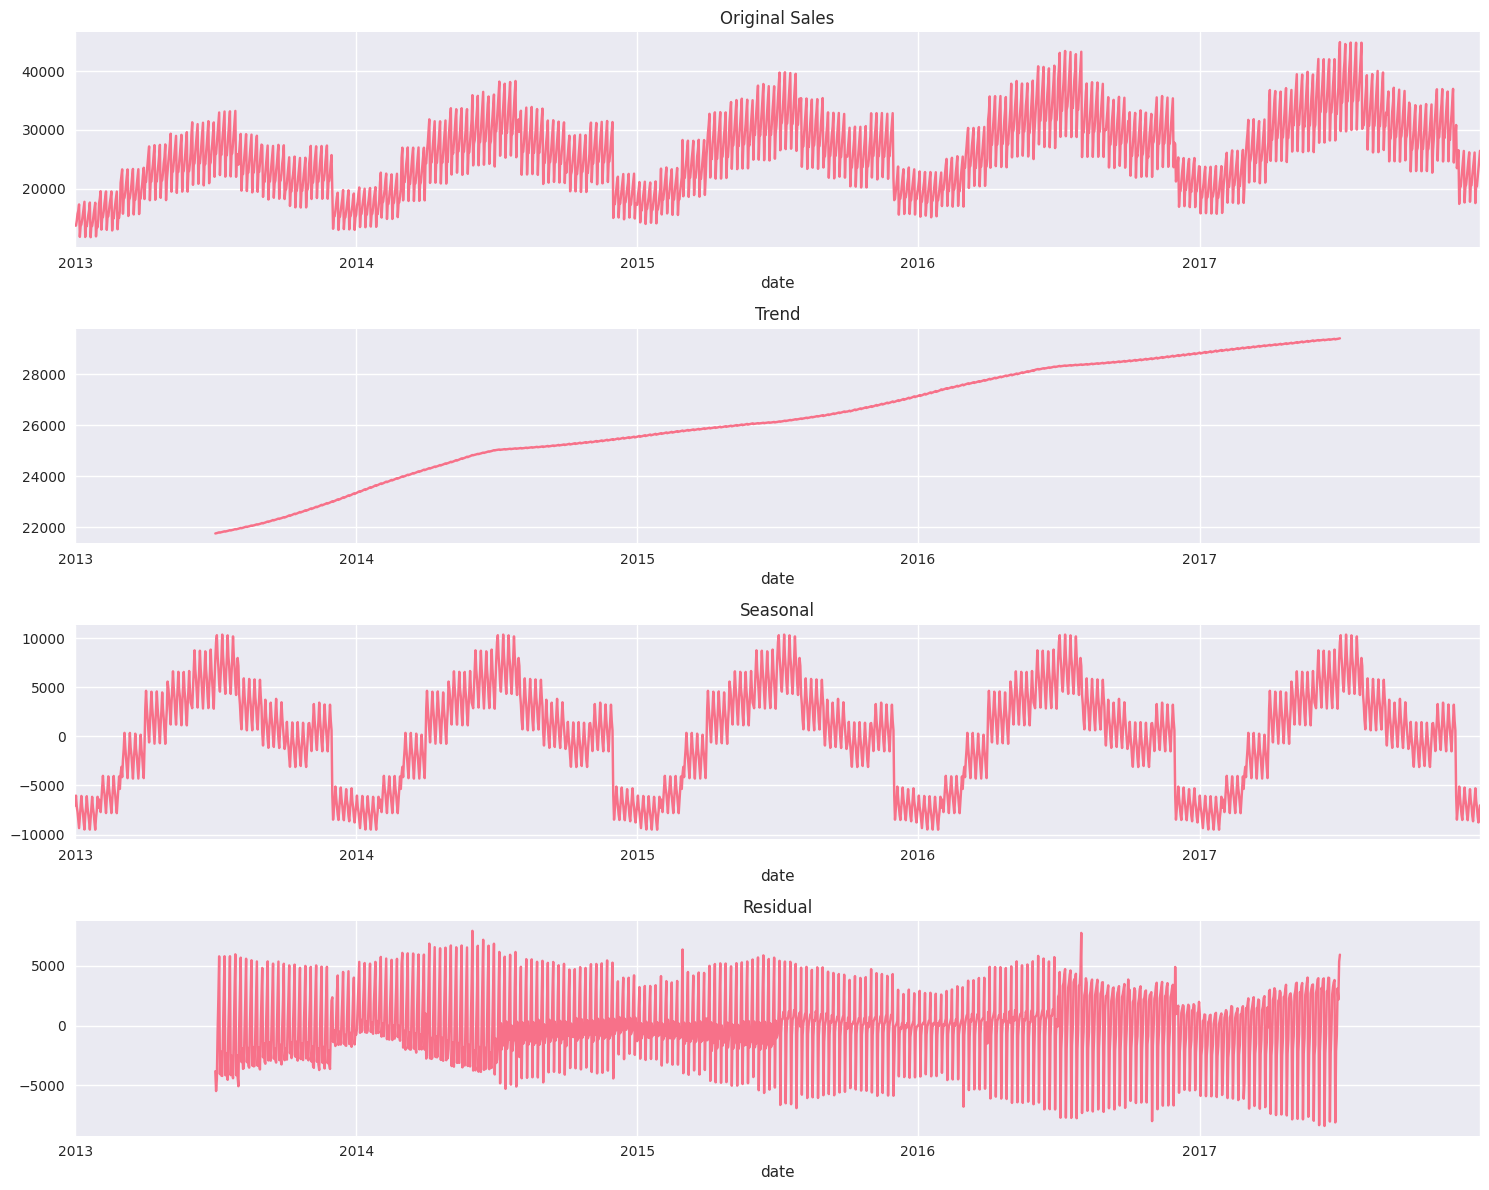

In [19]:
# Seasonal decomposition (if statsmodels is available)
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    if 'date' in train_df.columns:
        # Aggregate daily sales
        daily_sales = train_df.groupby('date')['sales'].sum().reset_index()
        daily_sales = daily_sales.set_index('date')
        daily_sales = daily_sales.asfreq('D', fill_value=0)
        
        if len(daily_sales) > 2 * 365:  # Need at least 2 years
            decomposition = seasonal_decompose(daily_sales['sales'], model='additive', period=365)
            
            fig, axes = plt.subplots(4, 1, figsize=(15, 12))
            
            decomposition.observed.plot(ax=axes[0], title='Original Sales')
            decomposition.trend.plot(ax=axes[1], title='Trend')
            decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
            decomposition.resid.plot(ax=axes[3], title='Residual')
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"Not enough data for seasonal decomposition. Need 2+ years, have {len(daily_sales)} days")
            
except ImportError:
    print("statsmodels not available for seasonal decomposition")

In [20]:
# Outlier analysis
if 'sales' in train_df.columns:
    # Using IQR method
    Q1 = train_df['sales'].quantile(0.25)
    Q3 = train_df['sales'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = train_df[(train_df['sales'] < lower_bound) | (train_df['sales'] > upper_bound)]
    
    print(f"Outlier Analysis (IQR method):")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers):,} ({len(outliers)/len(train_df)*100:.2f}%)")
    
    if len(outliers) > 0:
        print(f"Outlier sales range: {outliers['sales'].min():.2f} to {outliers['sales'].max():.2f}")

Outlier Analysis (IQR method):
Q1: 30.00
Q3: 70.00
IQR: 40.00
Lower bound: -30.00
Upper bound: 130.00
Number of outliers: 11,967 (1.31%)
Outlier sales range: 131.00 to 231.00


In [ ]:
# Advanced Statistical Analysis and Feature Engineering Insights
def advanced_statistical_analysis(train_df):
    """Advanced statistical analysis and feature engineering insights"""
    print("Performing advanced statistical tests...")
    
    # Feature engineering for analysis
    df_temp = train_df.copy()
    if 'date' in df_temp.columns:
        df_temp['date'] = pd.to_datetime(df_temp['date'])
        df_temp['month'] = df_temp['date'].dt.month
        df_temp['weekday'] = df_temp['date'].dt.weekday
        df_temp['quarter'] = df_temp['date'].dt.quarter
    
    # Interaction effects analysis
    if 'store' in df_temp.columns and 'item' in df_temp.columns:
        # Create store-item interaction
        interaction_stats = df_temp.groupby(['store', 'item'])['sales'].agg(['mean', 'std', 'count']).reset_index()
        
        print(f"\\nStore-Item Interactions:")
        print(f"Total unique store-item combinations: {len(interaction_stats)}")
        print(f"Average sales per combination: {interaction_stats['mean'].mean():.2f}")
        print(f"Most profitable combination: Store {interaction_stats.loc[interaction_stats['mean'].idxmax(), 'store']}, Item {interaction_stats.loc[interaction_stats['mean'].idxmax(), 'item']} (Avg: {interaction_stats['mean'].max():.2f})")
        
        # Two-way ANOVA
        try:
            if SCIPY_AVAILABLE:
                # Sample for computation efficiency
                sample_df = df_temp.sample(min(10000, len(df_temp)), random_state=42)
                
                # Kruskal-Wallis test (non-parametric alternative to ANOVA)
                from scipy.stats import kruskal
                
                # Test for store effects
                store_groups = [group['sales'].values for name, group in sample_df.groupby('store')]
                h_stat_store, p_val_kruskal_store = kruskal(*store_groups)
                print(f"\\nKruskal-Wallis test (Store effect): H-statistic={h_stat_store:.2f}, p-value={p_val_kruskal_store:.2e}")
                
                # Test for item effects
                item_groups = [group['sales'].values for name, group in sample_df.groupby('item')]
                h_stat_item, p_val_kruskal_item = kruskal(*item_groups)
                print(f"Kruskal-Wallis test (Item effect): H-statistic={h_stat_item:.2f}, p-value={p_val_kruskal_item:.2e}")
            else:
                print("\\nKruskal-Wallis tests require scipy (not available)")
                
        except ImportError:
            print("Advanced statistical tests require scipy")
    
    # Sales distribution analysis by segments
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Sales distribution by store quartiles
    if 'store' in df_temp.columns:
        store_means = df_temp.groupby('store')['sales'].mean()
        q1, q2, q3 = store_means.quantile([0.25, 0.5, 0.75])
        
        low_stores = store_means[store_means <= q1].index
        mid_stores = store_means[(store_means > q1) & (store_means <= q3)].index  
        high_stores = store_means[store_means > q3].index
        
        axes[0, 0].hist(df_temp[df_temp['store'].isin(low_stores)]['sales'], 
                       alpha=0.7, label=f'Low Perf. Stores (n={len(low_stores)})', bins=50)
        axes[0, 0].hist(df_temp[df_temp['store'].isin(mid_stores)]['sales'], 
                       alpha=0.7, label=f'Mid Perf. Stores (n={len(mid_stores)})', bins=50)
        axes[0, 0].hist(df_temp[df_temp['store'].isin(high_stores)]['sales'], 
                       alpha=0.7, label=f'High Perf. Stores (n={len(high_stores)})', bins=50)
        axes[0, 0].set_title('Sales Distribution by Store Performance')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
    
    # Coefficient of variation analysis
    if 'store' in df_temp.columns:
        store_cv = df_temp.groupby('store')['sales'].agg(['mean', 'std'])
        store_cv['cv'] = store_cv['std'] / store_cv['mean']
        
        axes[0, 1].scatter(store_cv['mean'], store_cv['cv'], s=100, alpha=0.7)
        axes[0, 1].set_xlabel('Mean Sales')
        axes[0, 1].set_ylabel('Coefficient of Variation')
        axes[0, 1].set_title('Sales Variability vs Mean (Store Level)')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Add correlation
        correlation = np.corrcoef(store_cv['mean'], store_cv['cv'])[0, 1]
        axes[0, 1].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                       transform=axes[0, 1].transAxes, bbox=dict(boxstyle='round', facecolor='wheat'))
    
    # Time-based variance analysis
    if 'date' in df_temp.columns:
        monthly_var = df_temp.groupby('month')['sales'].var()
        axes[1, 0].bar(monthly_var.index, monthly_var.values, color='lightblue', alpha=0.7)
        axes[1, 0].set_title('Sales Variance by Month')
        axes[1, 0].set_xlabel('Month')
        axes[1, 0].set_ylabel('Variance')
        axes[1, 0].grid(True, alpha=0.3)
    
    # Sales growth analysis
    if 'date' in df_temp.columns:
        monthly_sales = df_temp.groupby(df_temp['date'].dt.to_period('M'))['sales'].sum()
        growth_rates = monthly_sales.pct_change().dropna()
        
        axes[1, 1].plot(range(len(growth_rates)), growth_rates.values, marker='o', alpha=0.7)
        axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
        axes[1, 1].set_title('Monthly Sales Growth Rate')
        axes[1, 1].set_xlabel('Month Index')
        axes[1, 1].set_ylabel('Growth Rate')
        axes[1, 1].grid(True, alpha=0.3)
        
        # Add statistics
        mean_growth = growth_rates.mean()
        std_growth = growth_rates.std()
        axes[1, 1].text(0.05, 0.95, f'Mean: {mean_growth:.3f}\\nStd: {std_growth:.3f}', 
                       transform=axes[1, 1].transAxes, bbox=dict(boxstyle='round', facecolor='lightgreen'))
    
    plt.tight_layout()
    save_plot('07_advanced_statistical_analysis.png')

# Run advanced statistical analysis
advanced_statistical_analysis(train_df)

## 10. Advanced Statistical Analysis

## 8. Test Data Comparison

In [21]:
# Compare train and test data structure
print("TRAIN vs TEST COMPARISON")
print("="*50)

print(f"Common columns: {set(train_df.columns) & set(test_df.columns)}")
print(f"Train-only columns: {set(train_df.columns) - set(test_df.columns)}")
print(f"Test-only columns: {set(test_df.columns) - set(train_df.columns)}")

# Compare feature ranges
common_cols = set(train_df.columns) & set(test_df.columns)
for col in common_cols:
    if train_df[col].dtype in ['int64', 'float64']:
        train_min, train_max = train_df[col].min(), train_df[col].max()
        test_min, test_max = test_df[col].min(), test_df[col].max()
        print(f"\n{col}:")
        print(f"  Train range: {train_min} to {train_max}")
        print(f"  Test range:  {test_min} to {test_max}")
        print(f"  Overlap: {max(train_min, test_min) <= min(train_max, test_max)}")

TRAIN vs TEST COMPARISON
Common columns: {'item', 'date', 'store'}
Train-only columns: {'day', 'year', 'day_of_year', 'weekday', 'month', 'sales'}
Test-only columns: {'id'}

item:
  Train range: 1 to 50
  Test range:  1 to 50
  Overlap: True

store:
  Train range: 1 to 10
  Test range:  1 to 10
  Overlap: True


## 9. Summary and Key Insights

In [22]:
# Generate comprehensive summary
print("COMPREHENSIVE SUMMARY REPORT")
print("="*60)

print(f"\n📊 Dataset Overview:")
print(f"   • Training samples: {len(train_df):,}")
print(f"   • Test samples: {len(test_df):,}")
print(f"   • Features in train: {len(train_df.columns)}")
print(f"   • Features in test: {len(test_df.columns)}")

if 'sales' in train_df.columns:
    print(f"\n💰 Sales Statistics:")
    print(f"   • Mean sales: {train_df['sales'].mean():.2f}")
    print(f"   • Median sales: {train_df['sales'].median():.2f}")
    print(f"   • Sales range: {train_df['sales'].min():.2f} - {train_df['sales'].max():.2f}")
    print(f"   • Standard deviation: {train_df['sales'].std():.2f}")
    print(f"   • Coefficient of variation: {train_df['sales'].std() / train_df['sales'].mean():.3f}")

if 'store' in train_df.columns:
    print(f"\n🏪 Store Information:")
    print(f"   • Number of stores: {train_df['store'].nunique()}")
    print(f"   • Store range: {train_df['store'].min()} - {train_df['store'].max()}")

if 'item' in train_df.columns:
    print(f"\n📦 Item Information:")
    print(f"   • Number of items: {train_df['item'].nunique()}")
    print(f"   • Item range: {train_df['item'].min()} - {train_df['item'].max()}")

if 'date' in train_df.columns:
    print(f"\n📅 Temporal Information:")
    print(f"   • Date range: {train_df['date'].min()} to {train_df['date'].max()}")
    print(f"   • Number of years: {train_df['year'].nunique()}")
    print(f"   • Total days: {(train_df['date'].max() - train_df['date'].min()).days + 1}")

print(f"\n🔍 Data Quality:")
missing_train = train_df.isnull().sum().sum()
missing_test = test_df.isnull().sum().sum()
print(f"   • Missing values in train: {missing_train}")
print(f"   • Missing values in test: {missing_test}")
print(f"   • Data completeness: {((len(train_df) * len(train_df.columns) - missing_train) / (len(train_df) * len(train_df.columns)) * 100):.1f}%")

print(f"\n🎯 Key Insights for Modeling:")
print(f"   • This appears to be a time series forecasting problem")
print(f"   • Multiple stores and items suggest hierarchical forecasting approach")
print(f"   • Consider seasonal patterns and trends in your models")
print(f"   • Store and item effects should be modeled")
print(f"   • Check for any data leakage between train and test sets")

print("\n" + "="*60)
print("EDA COMPLETED SUCCESSFULLY! 🎉")
print("="*60)

COMPREHENSIVE SUMMARY REPORT

📊 Dataset Overview:
   • Training samples: 913,000
   • Test samples: 45,000
   • Features in train: 9
   • Features in test: 4

💰 Sales Statistics:
   • Mean sales: 52.25
   • Median sales: 47.00
   • Sales range: 0.00 - 231.00
   • Standard deviation: 28.80
   • Coefficient of variation: 0.551

🏪 Store Information:
   • Number of stores: 10
   • Store range: 1 - 10

📦 Item Information:
   • Number of items: 50
   • Item range: 1 - 50

📅 Temporal Information:
   • Date range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00
   • Number of years: 5
   • Total days: 1826

🔍 Data Quality:
   • Missing values in train: 0
   • Missing values in test: 0
   • Data completeness: 100.0%

🎯 Key Insights for Modeling:
   • This appears to be a time series forecasting problem
   • Multiple stores and items suggest hierarchical forecasting approach
   • Consider seasonal patterns and trends in your models
   • Store and item effects should be modeled
   • Check for any data